# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [4]:
def analise_bivariada(df, resposta:str, explicativa:str):
    df1 = pd.crosstab(df[resposta], df[explicativa], margins=True)
    df1['Probabilidade'] = df1[1]/df1['All']
    df1['Odds'] = df1[1]/df1[0]
    df1['Odds_ratio'] = df1['Odds']/df1.loc['All', 'Odds']
    df1['Logito'] = np.log(df1['Odds'])
    df1['WOE'] = np.log(df1['Odds_ratio'])
    return df1

In [5]:
analise_bivariada(df, 'sex', 'flag_doente')

flag_doente,0,1,All,Probabilidade,Odds,Odds_ratio,Logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [6]:
analise_bivariada(df, 'ca', 'flag_doente')  

flag_doente,0,1,All,Probabilidade,Odds,Odds_ratio,Logito,WOE
ca,,,,,,,,
0.0,130,46,176,0.261364,0.353846,0.417488,-1.038893,-0.873501
1.0,21,44,65,0.676923,2.095238,2.472079,0.739667,0.905060
2.0,7,31,38,0.815789,4.428571,5.225077,1.488077,1.653470
3.0,3,17,20,0.850000,5.666667,6.685851,1.734601,1.899994
?,3,1,4,0.250000,0.333333,0.393285,-1.098612,-0.933220
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [7]:
analise_bivariada(df, 'exang', 'flag_doente') 

flag_doente,0,1,All,Probabilidade,Odds,Odds_ratio,Logito,WOE
exang,,,,,,,,
0.0,141,63,204,0.308824,0.446809,0.527170,-0.805625,-0.640233
1.0,23,76,99,0.767677,3.304348,3.898655,1.195239,1.360632
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


A variável ca (números de vasos principais coloridos por fluorosopia) é o que discrimina mais o risco (probabilidade) de problema do cardiaco, visto que os que apresentam o número 3 possui o risco igual a 85%, aqueles com o número 2 apresentam risco de 81,5%, os com número 1 o risco fica em 67,7%, enquanto que com o número 0 o risco é de 26,14%. (OBS: esta variável apresenta 4 casos não identificáveis(?), mais que não impactam a estatítica por corresponder uma quantidade irrisória)

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [8]:
def analise_bivariada_continua(df, resposta:str, explicativa:str):
    frase=(resposta+'_range')
    df[frase]=pd.qcut(df[resposta], q=5)   
    df1 = pd.crosstab(df[frase], df[explicativa], margins=True)
    df1['Probabilidade'] = df1[1]/df1['All']
    df1['Odds'] = df1[1]/df1[0]
    df1['Odds_ratio'] = df1['Odds']/df1.loc['All', 'Odds']
    df1['Logito'] = np.log(df1['Odds'])
    df1['WOE'] = np.log(df1['Odds_ratio'])
    return df1

In [9]:
analise_bivariada_continua(df, 'age', 'flag_doente')

flag_doente,0,1,All,Probabilidade,Odds,Odds_ratio,Logito,WOE
age_range,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [10]:
analise_bivariada_continua(df, 'trestbps', 'flag_doente')

flag_doente,0,1,All,Probabilidade,Odds,Odds_ratio,Logito,WOE
trestbps_range,,,,,,,,
"(93.999, 120.0]",60,37,97,0.381443,0.616667,0.727578,-0.483427,-0.318034
"(120.0, 126.0]",10,15,25,0.600000,1.500000,1.769784,0.405465,0.570858
"(126.0, 134.0]",35,27,62,0.435484,0.771429,0.910175,-0.259511,-0.094119
"(134.0, 144.6]",34,24,58,0.413793,0.705882,0.832840,-0.348307,-0.182914
"(144.6, 200.0]",25,36,61,0.590164,1.440000,1.698993,0.364643,0.530036
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [11]:
reglog = smf.logit("flag_doente ~ C(sex) + C(cp) + trestbps+ age", data = df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Sun, 18 Sep 2022   Pseudo R-squ.:                  0.3097
Time:                        16:34:09   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(sex)[T.1.0]     1.8094      0.353      5.130      0.000       1.118       2.501
C(cp)[T.2.0]     -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]      0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]      2.4789      0.553      4.485      0.000       1.396       3.562
trestbps          0.0193      0.009      2.261      0.024       0.003       0.036
age               0.0567      0.018      3.120      0.002       0.021       0.092
=================================================================================
"""

Analisando os parâmtros deste modelo, verifica-se que o parâmetro C(cp)-T.2 e C(cp)T.3 não são relevantes para a constatação de existência de doença cardíaco, em virtude dos seus P-values serem 0,923 e 0,901, respectivamente. A significancia da variável se denota quando o valor do P-value é menor de 0,05.
Note-se, ainda, que o parâmetro coef do C(scp)[T.2.0] é negativo, o que demonstra que esta variável tem menos chance de apresentar doença cardíaca. Os demais parâmetros coed por serem positivo, demonstram chances de apresentar doença cardíaca, sendo o maior deles o C(cp)[T.4.0], ou seja, os assintomáticos na dores no peito.

In [12]:
reglog.params[1]

1.8093776803911708

In [13]:
np.exp(reglog.params[1]) 

# Razão de chances do perfil masculino ter doença cardíaca em relação ao perfil feminino. Ou seja, o homem tem 6 vezes mais chances de ter doença cardíaca em relação à mulher.

6.106645963961622

In [14]:
p_masculino = 1/(1 + np.exp(-reglog.params[1]))
p_masculino # probabilidade do homem ter doença cardíaca

0.8592866444914968

In [15]:
1/np.exp(reglog.params[1]) 

# Razão de chances do perfil feminino ter doença cardíaca em relação ao perfil masculino. Enfim, a mulher tem 16% de chances em relação à chance do homem de vir a ter doença cardíaca.

0.16375601367780301

In [16]:
np.exp(reglog.params[2])
# Razão de chances do perfil dor angina atípica ter doença cardiádica em relação à dor angina típica ter doença cardíaca.

0.940154815656731

In [17]:
p_dor_angina_atípica = 1/(1 + np.exp(-reglog.params[2]))
p_dor_angina_atípica #probabilidade de quem tem dor atípica de ter doença cardíaca

0.4845772141840619

In [18]:
np.exp(reglog.params[3])
# Razão de chances do perfil dor não angina ter doença cardiádica em relação à dor angina típica ter doença cardíaca.

1.0740992785545171

In [19]:
p_dor_não_angina = 1/(1 + np.exp(-reglog.params[3]))
p_dor_não_angina #probabilidade de quem tem dor não atípica de ter doença cardíaca

0.5178630018631891

In [20]:
np.exp(reglog.params[4])
# Razão de chances do perfil dor assintomático ter doença cardiádica em relação à dor angina típica ter doença cardíaca.

11.927616211082064

In [21]:
p_dor_assintomático= 1/(1+np.exp(-reglog.params[4]))
p_dor_assintomático #probabilidade de quem tem dor assintomático de ter doença cardíaca

0.9226462184774049

In [22]:
(reglog.params[5]) 
# para cada 1 mmHg de pressão aumenta 0.0192, aumentando a chance de ter doença cardíaca

0.019274328198821328

In [23]:
reglog.params[6]
# para cada 1 ano de idade que se aumenta, cresce 0,05665 a chance de ter doença cardíaca

0.056652166311161434

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [24]:
#Calculando a probabilidade de evento predita segundo o modelo

df = df.drop(['age_range', 'trestbps_range'], axis=1)
df['predito'] = reglog.predict(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.027278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,0.134492
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,0.929259
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,0.843216
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,0.064913


In [25]:
# Categorizando a probabilidade em G=5 grupos

cat_predito= pd.qcut(df.predito, q=5, duplicates='drop')
cat_predito.value_counts().sort_index()

(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: predito, dtype: int64

In [26]:
group_reg = df.groupby(cat_predito)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [27]:
#calculando a probabilidade do evento predita média por grupo

qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


In [28]:
#Calculando a taxa de eventos (média da variável indicadora de eventos) por grupo

qualid['pct_flag_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_flag_doente
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


Text(0.5, 0, 'Grupo')

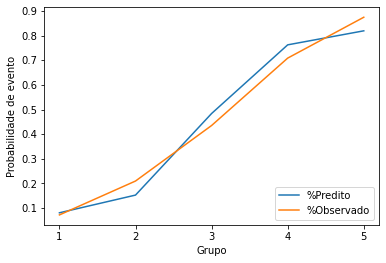

In [29]:
#Comparando graficamente o valor eperado versus observado para a taxa de maus por grupo

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_flag_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [30]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30% 
AUC: 85.19% 
GINI: 70.39%


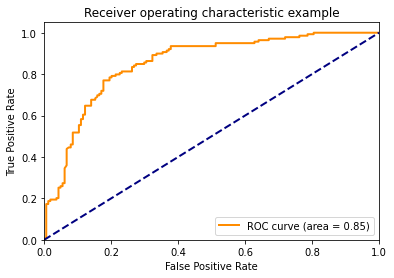

In [31]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Text(0, 0.5, 'Função Distribuição Acumulada')

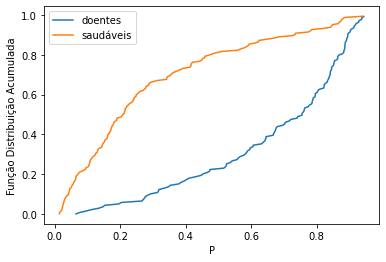

In [32]:
# gráfico KS

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='doentes')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='saudáveis')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [33]:
reglog1 = smf.logit("flag_doente ~ C(sex) + trestbps +  + C(cp, Treatment(3))+ ca + slope", data = df).fit()
reglog1.summary()

Optimization terminated successfully.
         Current function value: 0.370815
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                           10
Date:                Sun, 18 Sep 2022   Pseudo R-squ.:                  0.4624
Time:                        16:34:57   Log-Likelihood:                -112.36
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.082e-36
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -9.5671      1.659     -5.766      0.000     -12.819      -6.315
C(sex)[T.1.0]                  1.7581      0.401      4.381      0.000       0.972       2.545
C(cp, Treatment(3))[T.1.0]    -0.2633      0.672     -0.392      0.695      -1.581       1.054
C(cp, Treatment(3))[T.2.0]     0.3740      0.565      0.662      0.508      -0.732       1.480
C(cp, Treatment(3))[T.4.0]     2.4825      0.431      5.755      0.000       1.637       3.328
ca[T.1.0]                      2.2083      0.441      5.011      0.000       1.345       3.072
ca[T.2.0]                      2.7902      0.617      4.525      0.000       1.582       3.999
ca[T.3.0]                      2.4187      0.771      3.135      0.002       0.907       3.931
ca[T.?]                       -0.2978      1.483     -0.201      0.841      -3.205       2.610
trestbps                       0.0286      0.010      2.841      0.004       0.009       0.048
slope                          1.3490      0.291      4.644      0.000       0.780       1.918
==============================================================================================
"""

In [34]:
df['predito'] = reglog1.predict(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.529042
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.987385
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.973123
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.487803
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.015813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,0.096876
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,0.986276
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,0.964185
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,0.360393


In [35]:
cat_predito= pd.qcut(df.predito, q=5, duplicates='drop')
cat_predito.value_counts().sort_index()

(0.00294, 0.0677]    61
(0.0677, 0.256]      60
(0.256, 0.574]       61
(0.574, 0.908]       60
(0.908, 0.996]       61
Name: predito, dtype: int64

In [36]:
group_reg = df.groupby(cat_predito)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.00294, 0.0677]",61
"(0.0677, 0.256]",60
"(0.256, 0.574]",61
"(0.574, 0.908]",60
"(0.908, 0.996]",61


In [37]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.00294, 0.0677]",61,0.035156
"(0.0677, 0.256]",60,0.130530
"(0.256, 0.574]",61,0.404296
"(0.574, 0.908]",60,0.761179
"(0.908, 0.996]",61,0.962146


In [38]:
qualid['pct_flag_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_flag_doente
predito,,,
"(0.00294, 0.0677]",61,0.035156,0.016393
"(0.0677, 0.256]",60,0.130530,0.183333
"(0.256, 0.574]",61,0.404296,0.344262
"(0.574, 0.908]",60,0.761179,0.766667
"(0.908, 0.996]",61,0.962146,0.983607


Text(0.5, 0, 'Grupo')

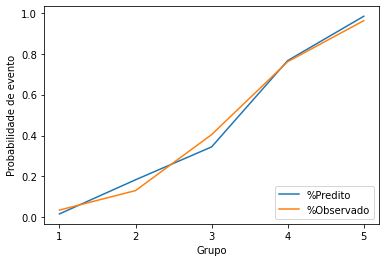

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_flag_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


In [40]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 82.18%
KS: 67.83% 
AUC: 91.16% 
GINI: 82.32%
